# Import Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib inline

C:\Users\RISHABH\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("D:\Titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Gender       418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# First 3 records

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Random samples from  the dataset

In [7]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,992,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C
217,1109,0,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,NaN,S
148,1040,0,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S


# Missing Value treatment

In [8]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df["Age"].fillna

<bound method Series.fillna of 0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64>

In [11]:
df["Age"].mean()

30.272590361445783

In [12]:
df["Age"].fillna(df["Age"].mean())

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [13]:
#Age int var : can use mean or median
df["Age"].fillna(df["Age"].mean(),inplace=True)#inplace-original data value stored changed in data frame

#Fare
df["Fare"].fillna(df["Fare"].mean(),inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

# Count,Mean,Std and 5 point Summary

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Check for duplicate values(df.drop_duplicates())

In [15]:
df.duplicated().sum()

0

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

# Check covariance and correlation between columns

In [17]:
df.cov() # no value of for measure 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,14595.166667,-1.352518,-2.720624,-47.125070,0.413669,5.107914,55.381110
Survived,-1.352518,0.231960,-0.044037,-0.000069,0.043165,0.075213,5.147044
Pclass,-2.720624,-0.044037,0.708690,-4.688260,0.000820,0.015467,-27.106073
Age,-47.125070,-0.000069,-4.688260,159.631454,-0.901138,-0.558902,230.563253
SibSp,0.413669,0.043165,0.000820,-0.901138,0.804178,0.270100,8.587338
Parch,5.107914,0.075213,0.015467,-0.558902,0.270100,0.963203,12.604875
Fare,55.381110,5.147044,-27.106073,230.563253,8.587338,12.604875,3118.161494


In [18]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.030874,0.003818,0.043080,0.008209
Survived,-0.023245,1.000000,-0.108615,-0.000011,0.099943,0.159120,0.191382
Pclass,-0.026751,-0.108615,1.000000,-0.440782,0.001087,0.018721,-0.576619
Age,-0.030874,-0.000011,-0.440782,1.000000,-0.079535,-0.045073,0.326800
SibSp,0.003818,0.099943,0.001087,-0.079535,1.000000,0.306895,0.171488
Parch,0.043080,0.159120,0.018721,-0.045073,0.306895,1.000000,0.230001
Fare,0.008209,0.191382,-0.576619,0.326800,0.171488,0.230001,1.000000


In [19]:
#The output column is survived
# Finding the correlation of dependent var with all independent vars
df.corr()['Survived']

PassengerId   -0.023245
Survived       1.000000
Pclass        -0.108615
Age           -0.000011
SibSp          0.099943
Parch          0.159120
Fare           0.191382
Name: Survived, dtype: float64

# Data Vizualization with Univariate Analysis


In [20]:
import seaborn as sns

# Categorical Data

# Count Plot is used when the data is categorical

# CountPlot: frequency/Actual count

<AxesSubplot:xlabel='Survived', ylabel='count'>

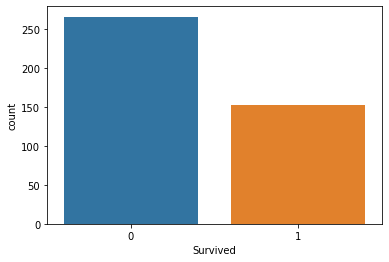

In [21]:
sns.countplot(x='Survived',data=df)

C:\Users\RISHABH\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

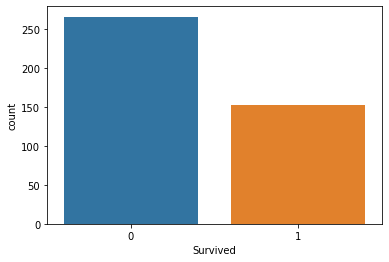

In [22]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

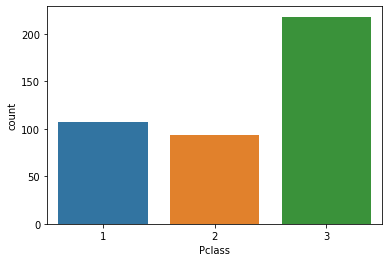

In [23]:
sns.countplot(x='Pclass',data=df)

# Countplot is used to fetch a particular data that can be fetched from using countplot

# PieChart:%age count/ distibution

<AxesSubplot:xlabel='Gender', ylabel='count'>

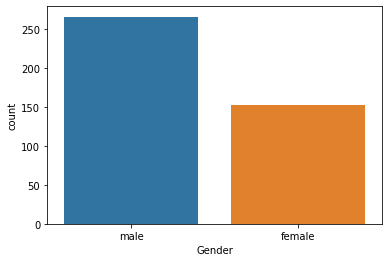

In [24]:
sns.countplot(x='Gender',data=df)

ValueError: could not convert string to float: 'male'

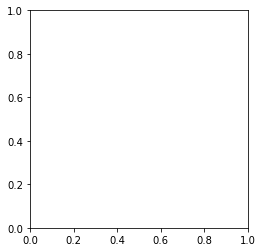

In [25]:
plt.pie(x=df['Gender'])
plt.show()

In [ ]:
a=df['Gender'].value_counts()
a

In [ ]:
plt.pie(x=a,autopct='%.2f')
plt.show()

# Numerical

# Histogram: Range Wise 

In [ ]:
# Age Categories:Numeric
sns.histplot(df['Age'],bins=5)


# Distplot: Probability of any value when randomly picked from the data

In [ ]:
# find distribution of Age
sns.distplot(df['Age'])

In [ ]:
sns.boxplot(x="Gender",y="Age",data=df)

In [ ]:
sns.boxplot(y="Age",data=df)

In [ ]:
df["Age"].mean()

In [ ]:
df["Fare"].mean()

In [ ]:
df["Age"].std()

In [ ]:
df.std()# df .std is for all the columns

In [ ]:
df["Age"].quantile([0.5,0.7,0.9])# 70 % percentage passengers having age less than 31
                                 # 90 % percentage passengers having age less than 48

# Bivariate and Multivariate analysis

# BarPlot(Numercial-Categorical)

In [ ]:
df.columns #columns which are available 

In [ ]:
df["Pclass"].unique

In [ ]:
sns.barplot(x = df['Fare'], y = df['Pclass']) # Categorical should be on X axis and on Y axis Numercial values

In [ ]:
sns.barplot(x = df['Pclass'],y = df['Fare'],hue=df['Gender'])

In [ ]:
df.corr()

# Heatmap(Correlation)

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="Blues",annot=True)

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

# Crosstab(Categorical-Categorical)

In [ ]:
#P class-wise survival
pd.crosstab(df['Pclass'],df['Survived'])

In [ ]:
# Numercial - Numerical
sns.pairplot(df)  #The data is not linearly co-related in all the graphs.

In [ ]:
import os
os.getcwd() # cwd stands for current working directory and os is operating system